# 05_데이터 정제

데이터 정제란 데이터 분석에 앞서 전처리가 완료된 데이터에 대해 **빈값(결측치)**이나 **정상 범위를 벗어난 값(이상치)** 들을 제거하거나 다른 값으로 대체하는 처리를 말합니다.
> 이상치를 먼저 결측치로 변경한 후 결측치를 처리하는 것이 기본적인 순서

## #01.결측치

> 비어있는 값 (DB에서의 NULL 과 비슷한 의미)

현장에서 만들어진 실제 데이터의 수집 과정에서 발생한 오류로 인해 결측치를 포함하고 있는 경우가 많다.

결측치가 있으면 통계 처리 함수가 적용되지 않거나 분석 결과가 왜곡되는 문제가 발생한다.

### 1) 결측치를 처리하는 대표적인 방법

1. 결측치 소거법
    - 결측치가 포함된 행 혹은 열을 제거하는 방법
    - 결측치가 포함된 데이터가 적은 경우는 상관없지만 결측치가 많을 경우 결과 왜곡이 발생할 수 있다.
1. 결측치 대체법
    - 결측치에 대표값이나 기술통계값을 적용하는 방법
    
### 2) 필요한 기본 패키지와 샘플 데이터 준비

#### a) 패키지 가져오기


In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

### 데이터 전처리
#### a) 인덱스 생성하기

In [2]:
df = pd.read_csv('grade.csv', encoding="euc-kr")
df.loc[len(df)] = ['민철', np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]
lis = list(df['이름'].values)
indexDic = {}
for k,v in enumerate(lis):
    indexDic[k] = v
df.rename(index= indexDic, inplace=True)
df.drop(['이름','성별','학년'], axis=1, inplace=True)
df

,국어,영어,수학,과학
철수,98.0,NaN,88.0,64.0
영희,88.0,90.0,62.0,72.0
민수,92.0,70.0,NaN,NaN
수현,63.0,60.0,31.0,70.0
호영,120.0,50.0,NaN,88.0
민철,NaN,NaN,NaN,NaN


In [3]:
# 열추가
df['한국사'] = None

In [4]:
df2 = pd.read_csv('grade.csv', encoding="euc-kr")
df2.set_index('이름',inplace=True)
df2.index.name = None
df2.drop(['학년','성별'], axis=1, inplace= True)
df2

,국어,영어,수학,과학
철수,98,NaN,88.0,64.0
영희,88,90.0,62.0,72.0
민수,92,70.0,NaN,NaN
수현,63,60.0,31.0,70.0
호영,120,50.0,NaN,88.0


In [5]:
rows,cols = df.shape
print('행 : ',  rows)
print('열 : ', cols)

행 :  6
열 :  5


#### b) 일부 데이터 확인
- head([n]) : 상위 n개 default 5
- tail([n]) : 하위 n개 default 5

In [6]:
print(df.head(3))
print('-' * 50)
print(df.tail(3))

      국어    영어    수학    과학   한국사
철수  98.0   NaN  88.0  64.0  None
영희  88.0  90.0  62.0  72.0  None
민수  92.0  70.0   NaN   NaN  None
--------------------------------------------------
       국어    영어    수학    과학   한국사
수현   63.0  60.0  31.0  70.0  None
호영  120.0  50.0   NaN  88.0  None
민철    NaN   NaN   NaN   NaN  None


### c)각 데이터의 결측치 여부 확인

> - 각 열에 ㄷ대해 결측치가 아닐 경우 False, 결측치는 True
> - `isna()` 함수 사용

In [7]:
n_df = df.isna()
n_df

,국어,영어,수학,과학,한국사
철수,False,True,False,False,True
영희,False,False,False,False,True
민수,False,False,True,True,True
수현,False,False,False,False,True
호영,False,False,True,False,True
민철,True,True,True,True,True


#### d) 각 열별로 결측치 수 파악하기
   - inna() 로 도출된 데잍터 프레임의 열별로 합계를 수행하며 True= 1, False 는 0으로 계산된다. 

In [8]:
n_df.sum()

국어     1
영어     2
수학     3
과학     2
한국사    6
dtype: int64

### 02. 결측치 소거

#### 1) 결측치가 포함된 모든 행 삭제
- 원본은 변화 없음, 삭제 결과가 return 된다.
- 만약 원본에 저장하려면 inplace = True

#### a) 행에 포함된 값 중 하나라도 결측치인 경우 삭제
> dropna() 사용

In [9]:
na1 = df.dropna()
na1

,국어,영어,수학,과학,한국사


#### b) 특정 컬럼에 대한 결측치만 제거
> - `dropna()`는 간단하게 사용할 수 있지만 분석에 필수적인 행 또한 손실 될 수 있다.
> - `subset` 파라미터에 정제를 적용할 컬럼이름을 리스트 형태로 나열 시 원하는 컬럼에 대해서만 적용 할 수 있다특ㅈ
#### 특정 열에 관련된 결측치만 삭제하고자 할 때

In [10]:
na2 = df.dropna(subset=['영어'])
na2

,국어,영어,수학,과학,한국사
영희,88.0,90.0,62.0,72.0,None
민수,92.0,70.0,NaN,NaN,None
수현,63.0,60.0,31.0,70.0,None
호영,120.0,50.0,NaN,88.0,None


In [11]:
na3 = df.dropna(subset=['영어','과학'])
na3

,국어,영어,수학,과학,한국사
영희,88.0,90.0,62.0,72.0,None
수현,63.0,60.0,31.0,70.0,None
호영,120.0,50.0,NaN,88.0,None


#### 행에 포함된 모든 값이 결측치인 경우 삭제

> - `how='all'`파라미터를 사용
> - 삭제될 가능성이 매우 적다. 

In [12]:
na4 = df.dropna(how='all')
na4

,국어,영어,수학,과학,한국사
철수,98.0,NaN,88.0,64.0,None
영희,88.0,90.0,62.0,72.0,None
민수,92.0,70.0,NaN,NaN,None
수현,63.0,60.0,31.0,70.0,None
호영,120.0,50.0,NaN,88.0,None


#### 2) 격측치가 포함된 모든 열 삭제

#### 열에 포함된 값 중 하나라도 결측치가 존재하면 해당 열 삭제
> axis = 1 사용

In [13]:
na5 = df.dropna(axis=1)
na5

""
철수
영희
민수
수현
호영
민철


#### 특정 행을 기준으로 결측치가 존재하면 해당 열 삭제

In [14]:
na6 = df.dropna(axis=1,subset='호영')
na6

,국어,영어,과학
철수,98.0,NaN,64.0
영희,88.0,90.0,72.0
민수,92.0,70.0,NaN
수현,63.0,60.0,70.0
호영,120.0,50.0,88.0
민철,NaN,NaN,NaN


#### 열에 포함된 모든 값이 결측치인 경우 삭제

In [15]:
na5 = df.dropna(axis=1,subset='호영')
na5

,국어,영어,과학
철수,98.0,NaN,64.0
영희,88.0,90.0,72.0
민수,92.0,70.0,NaN
수현,63.0,60.0,70.0
호영,120.0,50.0,88.0
민철,NaN,NaN,NaN


In [16]:
na7 = df.dropna(how='all', axis=1)
na7

,국어,영어,수학,과학
철수,98.0,NaN,88.0,64.0
영희,88.0,90.0,62.0,72.0
민수,92.0,70.0,NaN,NaN
수현,63.0,60.0,31.0,70.0
호영,120.0,50.0,NaN,88.0
민철,NaN,NaN,NaN,NaN


In [17]:
df

,국어,영어,수학,과학,한국사
철수,98.0,NaN,88.0,64.0,None
영희,88.0,90.0,62.0,72.0,None
민수,92.0,70.0,NaN,NaN,None
수현,63.0,60.0,31.0,70.0,None
호영,120.0,50.0,NaN,88.0,None
민철,NaN,NaN,NaN,NaN,None


## 02. 결측치 대체

### 01) 대표값으로 대체하기
> - `fillna()` 사용
> - 원본은 변화 없음, 대체 결과 리턴됨
> - 원본에 적용하려면 inplace = True

In [23]:
pd.set_option('future.no_silent_downcasting', True)
df3 = df.fillna(value=50.0)
df3

,국어,영어,수학,과학,한국사
철수,98.0,50.0,88.0,64.0,50.0
영희,88.0,90.0,62.0,72.0,50.0
민수,92.0,70.0,50.0,50.0,50.0
수현,63.0,60.0,31.0,70.0,50.0
호영,120.0,50.0,50.0,88.0,50.0
민철,50.0,50.0,50.0,50.0,50.0


#### 통계 분석 기반으로 대체하기

> 숫자형식이 아닌 컬럼은 `mean`이나 `median`을 사용할 수 없다

#### a) 결측치를 정제할 규칙 정의

#### strategy : mean(평균)또는 median(중앙값)
> SimpleImputer(missing_values=np.nan, strategy = '')

In [33]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

#### b) 결측치를 처리할 데이터 추출

In [35]:
df

,국어,영어,수학,과학,한국사
철수,98.0,NaN,88.0,64.0,None
영희,88.0,90.0,62.0,72.0,None
민수,92.0,70.0,NaN,NaN,None
수현,63.0,60.0,31.0,70.0,None
호영,120.0,50.0,NaN,88.0,None
민철,NaN,NaN,NaN,NaN,None


In [37]:
df5 = df.filter(['국어','수학','영어','과학']).drop('민철')
df5

,국어,수학,영어,과학
철수,98.0,88.0,NaN,64.0
영희,88.0,62.0,90.0,72.0
민수,92.0,NaN,70.0,NaN
수현,63.0,31.0,60.0,70.0
호영,120.0,NaN,50.0,88.0


In [38]:
df_imputed = pd.DataFrame(imputer.fit_transform(df5), columns=df5.columns, index = df5.index)

# 소수점 첫째자리
df_imputed = df_imputed.round(1)
df_imputed

,국어,수학,영어,과학
철수,98.0,88.0,67.5,64.0
영희,88.0,62.0,90.0,72.0
민수,92.0,60.3,70.0,73.5
수현,63.0,31.0,60.0,70.0
호영,120.0,60.3,50.0,88.0


## #02. 이상치(극단치)정제

### 정상적인 범위를 벗어난 극단적으로 크거나 작은 데이터

#### 이상치 제거를 위해 먼저 어디까지를 정상 범위로 볼 것인가 정해야 한다.

1. **논리적으로 판단하여 정하기**
    * 예를 들어 성인의 몸무게가 40-150kg 을 벗어나는 경우는 드물 것으로 판단하고, 이 범위를 벗어나면 극단치로 간주하는 것
    * 데이터 분석가의 주관에 따른다.
1. **통계적인 기준을 이용하기**
    * 상 하위 0.3% 또는 +- 3 표준 편차에 해당하는 만큼 극단적으로 크거나 작은 데이터는 극단치로 간주하는 방법

### 1) 이상치 존재 여부 확인하기 위해서 상자 그림 표시 
> 이상치를 원으로 표현하기 떄문에 한 눈에 확인할 수 있다.

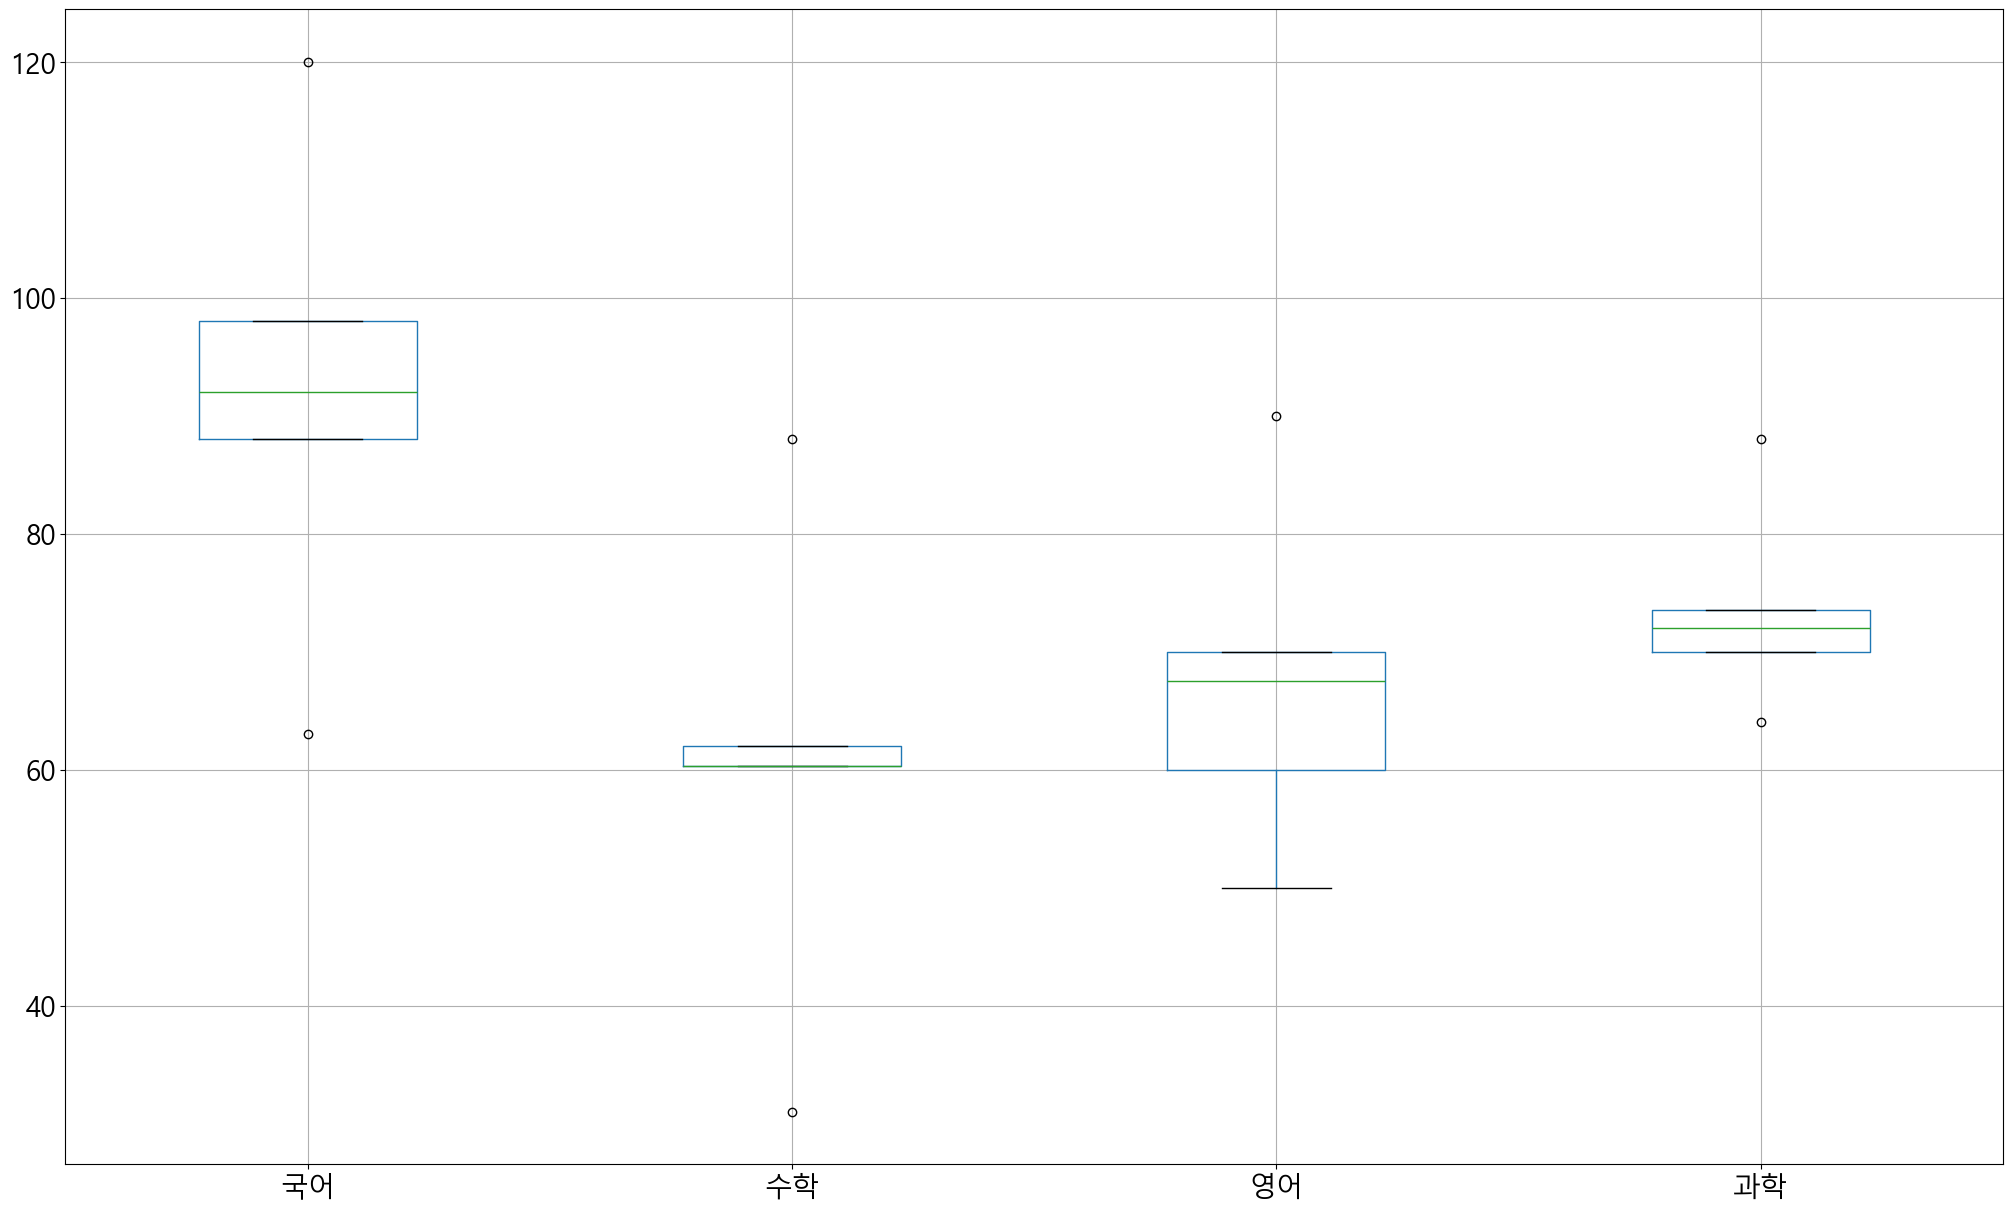

In [42]:
plt.rcParams["font.family"] = 'Malgun Gothic' # 사용할 폰트이름 지정(맑은 고딕)
plt.rcParams["font.size"] = 20                # 글자 크기
plt.rcParams["figure.figsize"] = (25,15)       # 그래프의 가로, 세로 크기 (inch단위)

df_imputed.boxplot()
plt.show()

### 이상치를 결측치로 변경하기

#### 국어점수 에 대한 이상치 필터링


In [44]:
df_k = df_imputed.query('국어>100')
df_k

,국어,수학,영어,과학
호영,120.0,60.3,50.0,88.0


In [45]:
df_k_index = list(df_k.index)
df_k_index


['호영']

#### 이상치를 갖는 인덱스에 대한 국어 점수를 결측치로 변경

In [47]:
for i in df_k_index:
     df_imputed.loc[i,'국어'] = np.nan
df_imputed

,국어,수학,영어,과학
철수,98.0,88.0,67.5,64.0
영희,88.0,62.0,90.0,72.0
민수,92.0,60.3,70.0,73.5
수현,63.0,31.0,60.0,70.0
호영,NaN,60.3,50.0,88.0


In [48]:
# 위에서 정의한 결측치 규칙을 가져와서 사용 
df_imputed2 = pd.DataFrame(imputer.fit_transform(df_imputed), columns=df_imputed.columns, index = df_imputed.index)

# 소수점 첫째 자리
df_imputed2 = df_imputed2.roundd()
df_imputed2

,국어,수학,영어,과학
철수,98.0,88.0,68.0,64.0
영희,88.0,62.0,90.0,72.0
민수,92.0,60.0,70.0,74.0
수현,63.0,31.0,60.0,70.0
호영,85.0,60.0,50.0,88.0
